In [24]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import cv2
from myshow import myshow
import sys
import sys
sys.path.append('include')
from scipy.io import loadmat, savemat
import cardiacDicomGlobals as cdg
import pandas as pd
import seaborn as sns
from scipy import stats


In [25]:



df = pd.DataFrame()
ind = 0
for patient in cdg.patientList:
    
    
    inFileName = "B0CorrectedImages/" + patient.mfr + ".mat"
    x = loadmat(inFileName)
    peakSignalMFI = np.transpose(x['peakSignalMFI'])    
    peakSignalSeg = np.transpose(x['peakSignalSeg'])    
    peakSignalUncorr = np.transpose(x['peakSignalUncorr'])    
    
    freqAxis = x['globalFreqSearch']  


    readout = patient.readout    
    longOrShort = 'long'
    if readout.find('short')>0:
        longOrShort = 'short'
    
    resonanceIndex = cdg.closestIndex(freqAxis,0)
    
    
    dataList = []
    metList = ['bicarbonate', 'lactate','pyruvate']
    labelList = ['uncorrected']*3
    methodList = ['gradient']*3
    dataList.append(peakSignalUncorr[resonanceIndex,0])
    dataList.append(peakSignalUncorr[resonanceIndex,1])
    dataList.append(peakSignalUncorr[resonanceIndex,2])
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['global shift only']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalUncorr[:,0].max())
    dataList.append(peakSignalUncorr[:,1].max())
    dataList.append(peakSignalUncorr[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['MFI']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalMFI[:,0].max())
    dataList.append(peakSignalMFI[:,1].max())
    dataList.append(peakSignalMFI[:,2].max())
    
    metList.extend(['bicarbonate', 'lactate','pyruvate'])
    labelList.extend(['Segmented']*3)
    methodList.extend(['gradient']*3)
    dataList.append(peakSignalSeg[:,0].max())
    dataList.append(peakSignalSeg[:,1].max())
    dataList.append(peakSignalSeg[:,2].max())

    df1 = pd.DataFrame(data=dataList, columns= ['objective function'])
    df2 = pd.DataFrame(data=labelList, columns= ['labels'])
    df3 = pd.DataFrame(data=[longOrShort]*len(dataList), columns= ['readout'])
    df4 = pd.DataFrame(data=metList, columns= ['metabolite'])
    df5 = pd.DataFrame(data=methodList, columns= ['method'])
    df6 = pd.DataFrame(data=[int(ind)]*len(dataList), columns= ['subject'])
    dfn = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

    df = pd.concat([df,dfn],axis=0, ignore_index = True)
    


    
    ind += 1
    
df.head(30)

,objective function,labels,readout,metabolite,method,subject
0,6.780727,uncorrected,long,bicarbonate,gradient,0
1,6.623572,uncorrected,long,lactate,gradient,0
2,5154.443618,uncorrected,long,pyruvate,gradient,0
3,14.529000,global shift only,long,bicarbonate,gradient,0
4,6.983925,global shift only,long,lactate,gradient,0
5,12261.053020,global shift only,long,pyruvate,gradient,0
6,15.954665,MFI,long,bicarbonate,gradient,0
7,6.873119,MFI,long,lactate,gradient,0
8,10785.426581,MFI,long,pyruvate,gradient,0
9,15.821792,Segmented,long,bicarbonate,gradient,0


In [26]:

ind = 0

#for patient in cdg.patientList:
dfi = df[df['subject']==ind]

dfi


,objective function,labels,readout,metabolite,method,subject
0,6.780727,uncorrected,long,bicarbonate,gradient,0
1,6.623572,uncorrected,long,lactate,gradient,0
2,5154.443618,uncorrected,long,pyruvate,gradient,0
3,14.529000,global shift only,long,bicarbonate,gradient,0
4,6.983925,global shift only,long,lactate,gradient,0
5,12261.053020,global shift only,long,pyruvate,gradient,0
6,15.954665,MFI,long,bicarbonate,gradient,0
7,6.873119,MFI,long,lactate,gradient,0
8,10785.426581,MFI,long,pyruvate,gradient,0
9,15.821792,Segmented,long,bicarbonate,gradient,0


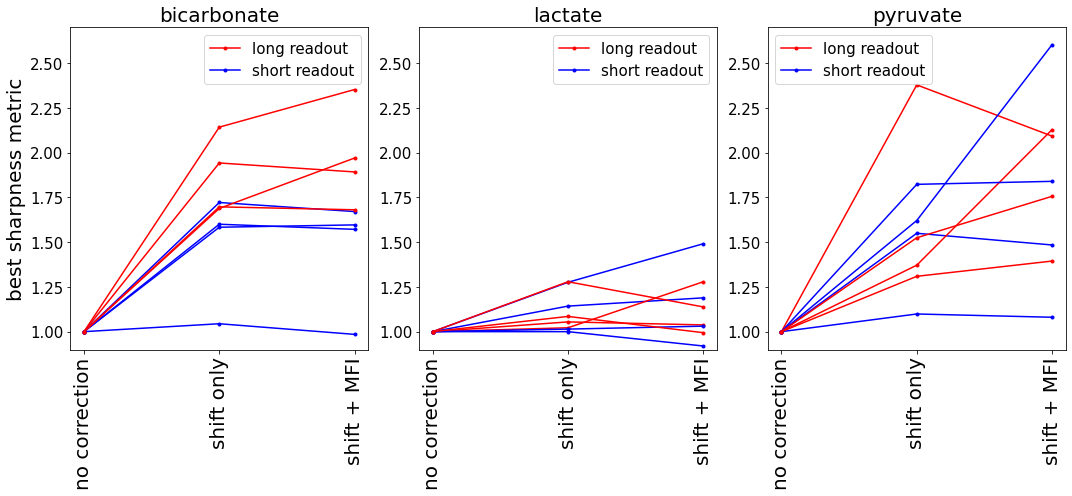

In [27]:

ind = 0
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7))  

l1 = [1,2,3,4]
l1 = [1,2,3]

# for storing percents
#dfp = pd.DataFrame()
bicarb_short_mfi = []
bicarb_long_mfi = []
lactate_short_mfi = []
lactate_long_mfi = []
pyruvate_short_mfi = []
pyruvate_long_mfi = []

bicarb_short_shift = []
bicarb_long_shift = []
lactate_short_shift = []
lactate_long_shift = []
pyruvate_short_shift = []
pyruvate_long_shift = []


for patient in cdg.patientList:
 
    dfi = df[df['subject']==ind]
    
    readoutSeries = dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='bicarbonate')]['readout']
    readout = readoutSeries.iloc[0]
    pltcolor = 'b.-'
    if readout == 'long':
        pltcolor = 'r.-'
    
    
    
    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='bicarbonate')]['objective function'])
    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]
    l2 = [1.0, f2/f1, f3/f1]
    
    ax1.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        bicarb_long_mfi.append(f3/f1)
        bicarb_long_shift.append(f2/f1)
    else:
        bicarb_short_mfi.append(f3/f1)
        bicarb_short_shift.append(f2/f1)
    

    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='lactate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='lactate')]['objective function'])

    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]
    l2 = [1.0, f2/f1, f3/f1]
   
    ax2.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        lactate_long_mfi.append(f3/f1)
        lactate_long_shift.append(f2/f1)
    else:
        lactate_short_mfi.append(f3/f1)
        lactate_short_shift.append(f2/f1)
    
    f1 = float(dfi[(dfi['labels']=='uncorrected' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f2 = float(dfi[(dfi['labels']=='global shift only' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f3 = float(dfi[(dfi['labels']=='MFI' ) & (dfi['metabolite']=='pyruvate')]['objective function'])
    f4 = float(dfi[(dfi['labels']=='Segmented' ) & (dfi['metabolite']=='pyruvate')]['objective function'])

    l2 = [1.0, f2/f1, f3/f1, f4/f1]
    #l2 = [f2/f1, f3/f1, f4/f1]
    l2 = [1.0, f2/f1, f3/f1]
    
    ax3.plot(l1,l2, pltcolor, label=readout +' readout')
    
    if readout == 'long':
        pyruvate_long_mfi.append(f3/f1)
        pyruvate_long_shift.append(f2/f1)
    else:
        pyruvate_short_mfi.append(f3/f1)
        pyruvate_short_shift.append(f2/f1)
    
    ind += 1

    
fs = 20
tr = 90
#tickLabs = ['no correction', 'shift only', 'shift + MFI', 'shift + segmented']
#tickLabs = [ 'shift only', 'shift + MFI', 'shift + segmented']
tickLabs = ['no correction', 'shift only', 'shift + MFI']

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), fontsize=15)    
ax1.set_title('bicarbonate', fontsize=fs)
ax1.set_xticks(l1)
ax1.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)
ax1.set_ylabel('best sharpness metric', fontsize=fs)
ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.set_ylim([.9, 2.7])

ax2.legend(by_label.values(), by_label.keys(), fontsize=15)    
ax2.set_title('lactate', fontsize=fs)
ax2.set_xticks(l1)
ax2.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.set_ylim([.9, 2.7])

ax3.legend(by_label.values(), by_label.keys(), fontsize=15)    
ax3.set_title('pyruvate', fontsize=fs)
ax3.set_xticks(l1)
ax3.set_xticklabels(tickLabs, rotation=tr, fontsize=fs)
ax3.tick_params(axis='y', which='major', labelsize=15)
ax3.set_ylim([.9, 2.7])


fig.tight_layout()
fig.savefig('rawFigs/sharpnessMeasureAllSubjects.pdf')



In [28]:
def printMeanStd(x):
    print(str(np.mean(x)) + ' +/- ' + str(np.std(x)))

    

print('long readout')
print('bicarb mfi')
printMeanStd(bicarb_long_mfi)
print('lactate mfi')
printMeanStd(lactate_long_mfi)
print('pyruvate mfi')
printMeanStd(pyruvate_long_mfi)


print('bicarb shift')
printMeanStd(bicarb_long_shift)
print('lactate shift')
printMeanStd(lactate_long_shift)
print('pyruvate shift')
printMeanStd(lactate_long_shift)

print('\n\n')

print('short readout')

print('bicarb mfi')
printMeanStd(bicarb_short_mfi)
print('lactate mfi')
printMeanStd(lactate_short_mfi)
print('pyruvate mfi')
printMeanStd(pyruvate_short_mfi)


print('bicarb shift')
printMeanStd(bicarb_short_shift)
print('lactate shift')
printMeanStd(lactate_short_shift)
print('pyruvate shift')
printMeanStd(lactate_short_shift)


print('\n\n')

print('long and short joined')


bicarb_shift_joined =  bicarb_short_shift +  bicarb_long_shift
bicarb_mfi_joined =  bicarb_short_mfi +  bicarb_long_mfi
lactate_shift_joined =  lactate_short_shift +  lactate_long_shift
lactate_mfi_joined =  lactate_short_mfi +  lactate_long_mfi
pyruvate_shift_joined =  pyruvate_short_shift +  pyruvate_long_shift
pyruvate_mfi_joined =  pyruvate_short_mfi +  pyruvate_long_mfi

print('bicarb shift')
printMeanStd(bicarb_shift_joined)
print('bicarb MFI')
printMeanStd(bicarb_mfi_joined)

print(stats.ttest_rel(bicarb_shift_joined, bicarb_mfi_joined))

print('lactate shift')
printMeanStd(lactate_shift_joined)
print('lactate MFI')
printMeanStd(lactate_mfi_joined)
print(stats.ttest_rel(lactate_shift_joined, lactate_mfi_joined))

print('pyruvate shift')
printMeanStd(pyruvate_shift_joined)
print('pyruvate MFI')
printMeanStd(pyruvate_mfi_joined)
print(stats.ttest_rel(pyruvate_shift_joined, pyruvate_mfi_joined))

print('\n\n')


print(stats.ttest_rel(bicarb_long_shift, bicarb_long_mfi))
print(stats.ttest_rel(pyruvate_long_shift, pyruvate_long_mfi))
print(stats.ttest_rel(lactate_long_shift, lactate_long_mfi))

print(stats.ttest_rel(bicarb_short_shift, bicarb_short_mfi))
print(stats.ttest_rel(pyruvate_short_shift, pyruvate_short_mfi))
print(stats.ttest_rel(lactate_short_shift, lactate_short_mfi))


long readout
bicarb mfi
1.9741310058186556 +/- 0.24298003463135157
lactate mfi
1.112240767326841 +/- 0.10943918488558933
pyruvate mfi
1.8429980309459966 +/- 0.29695278474734454
bicarb shift
1.8677105520319868 +/- 0.18868423107949753
lactate shift
1.1100223850978113 +/- 0.09999718311671157
pyruvate shift
1.1100223850978113 +/- 0.09999718311671157



short readout
bicarb mfi
1.4560001431975051 +/- 0.2744741346914485
lactate mfi
1.157648066096947 +/- 0.21502511968074176
pyruvate mfi
1.752023232851045 +/- 0.5602023523221963
bicarb shift
1.4873699343222482 +/- 0.2613665745494351
lactate shift
1.1082402036846162 +/- 0.11164016719572889
pyruvate shift
1.1082402036846162 +/- 0.11164016719572889



long and short joined
bicarb shift
1.6775402431771176 +/- 0.2968532618059631
bicarb MFI
1.7150655745080803 +/- 0.3664731526621977
Ttest_relResult(statistic=-0.8032440287678506, pvalue=0.44824480065100414)
lactate shift
1.1091312943912137 +/- 0.10598243167634486
lactate MFI
1.134944416711894 +/- 0.172

In [29]:
df_peak = df[df['method'] == 'peak signal']
df_grad = df[df['method'] == 'gradient']


df_bg = df_grad[df_grad['metabolite'] == 'bicarbonate']
df_pg = df_grad[df_grad['metabolite'] == 'pyruvate']
df_lg = df_grad[df_grad['metabolite'] == 'lactate']

df_bp = df_peak[df_peak['metabolite'] == 'bicarbonate']
df_pp = df_peak[df_peak['metabolite'] == 'pyruvate']
df_lp = df_peak[df_peak['metabolite'] == 'lactate']




Text(0.5, 1.0, 'bicarbonate')

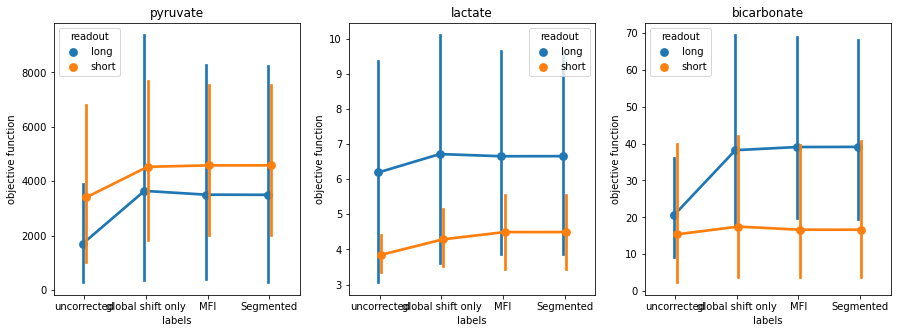

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x="labels", y="objective function", hue="readout", data=df_pg , dodge=True, ax=ax1)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_lg , dodge=True, ax=ax2)
sns.pointplot(x="labels", y="objective function", hue="readout", data=df_bg , dodge=True,ax=ax3)
ax1.set_title('pyruvate')
ax2.set_title('lactate')
ax3.set_title('bicarbonate')




#ax1 = sns.catplot(x="labels", y="objective function", hue="readout", data=df_p , kind='point')

load the corrected and uncorrected images, generated in the previous notebook

In [31]:


cdg.patientList



short readout, GS
1.0032602711431107+/-0.024010859740760625
short readout, MFI
1.0096278907338914+/-0.03059346221696238
long readout, GS
0.9780273648069568+/-0.03977291207463443
long readout, MFI
1.025432678386759+/-0.05498895865660343


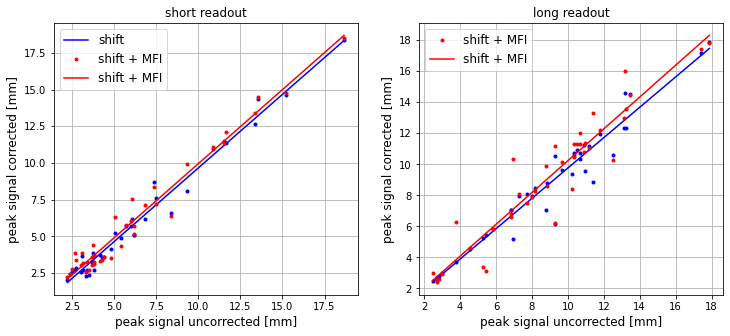

In [32]:

df = pd.DataFrame()
ind = 0

long_x = []
long_y1 = []
long_y2 = []
short_x = []
short_y1 = []
short_y2 = []

long_fwhm_unc = []
long_fwhm_gs = []
long_fwhm_mfi = []
short_fwhm_unc = []
short_fwhm_gs = []
short_fwhm_mfi = []


for patient in cdg.patientList:
    
    
    inFileName = "B0CorrectedImages/" + patient.mfr + ".mat"
    x = loadmat(inFileName)
    readoutStr = x['readoutStr']

    circ_profile_unc = x['circ_profile_unc']   
    circ_profile_gs = x['circ_profile_gs']    
    circ_profile_mfi = x['circ_profile_mfi']
    
    circ_fwhm_unc = x['fwhm_unc']    
    circ_fwhm_gs =  x['fwhm_gs']   
    circ_fwhm_mfi = x['fwhm_mfi']
    
    x = np.squeeze(circ_profile_unc)
    y1 = np.squeeze(circ_profile_gs)
    y2 = np.squeeze(circ_profile_mfi)
    
    fwhm_unc = np.squeeze(circ_fwhm_unc)
    fwhm_gs = np.squeeze(circ_fwhm_gs)
    fwhm_mfi = np.squeeze(circ_fwhm_mfi)
    
    for seg in range(len(x)):
        if readoutStr =='short':
            short_x.append(x[seg])
            short_y1.append(y1[seg])
            short_y2.append(y2[seg])
            
            if(fwhm_unc[seg]>0) and (fwhm_gs[seg]>0) and (fwhm_mfi[seg]>0):
                short_fwhm_unc.append(fwhm_unc[seg])
                short_fwhm_gs.append(fwhm_gs[seg])
                short_fwhm_mfi.append(fwhm_mfi[seg])
            
        else:
            long_x.append(x[seg])
            long_y1.append(y1[seg])
            long_y2.append(y2[seg])
            
            if(fwhm_unc[seg]>0) and (fwhm_gs[seg]>0) and (fwhm_mfi[seg]>0):
                #if(fwhm_unc[seg]<45) and (fwhm_gs[seg]<45) and (fwhm_mfi[seg]<25):
                if(fwhm_unc[seg]<60) and (fwhm_gs[seg]<60) and (fwhm_mfi[seg]<60):

                    long_fwhm_unc.append(fwhm_unc[seg])
                    long_fwhm_gs.append(fwhm_gs[seg])
                    long_fwhm_mfi.append(fwhm_mfi[seg])
        
def applyFits(x,y):
    x  = np.array(x)
    y  = np.array(y)
    xp = np.linspace(x.min(), x.max(), 100)
    z, cov  = np.polyfit(x, y, 1, cov=True)
    fit = np.poly1d(z)
    return xp, z, fit, cov


fs=12

xp1s, z1s, fit1s, cov1s = applyFits(short_x, short_y1)
xp2s, z2s, fit2s, cov2s = applyFits(short_x, short_y2)
xp1l, z1l, fit1l, cov1l = applyFits(long_x, long_y1)
xp2l, z2l, fit2l, cov2l = applyFits(long_x, long_y2)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(short_x, short_y1,'b.')
ax1.plot(xp1s, fit1s(xp1s),'b-', label='shift')

ax1.plot(short_x, short_y2,'r.',xp2s, fit2s(xp2s),'r-', label='shift + MFI')
ax1.set_xlabel('peak signal uncorrected [mm]', fontsize=fs)
ax1.set_ylabel('peak signal corrected [mm]', fontsize=fs)
ax1.set_title('short readout', fontsize=fs)
ax1.legend(fontsize=fs)
ax1.grid(True)

ax2.plot(long_x, long_y1,'b.',xp1l, fit1l(xp1l),'b-')
ax2.plot(long_x, long_y2,'r.',xp2l, fit2l(xp2l),'r-', label='shift + MFI')
ax2.set_xlabel('peak signal uncorrected [mm]', fontsize=fs)
ax2.set_ylabel('peak signal corrected [mm]', fontsize=fs)
ax2.set_title('long readout', fontsize=fs)
ax2.legend(fontsize=fs)
ax2.grid(True)

print('short readout, GS')
print(str(z1s[0])+'+/-'+str(np.sqrt(np.diag(cov1s))[0]))
print('short readout, MFI')
print(str(z2s[0])+'+/-'+str(np.sqrt(np.diag(cov2s))[0]))

print('long readout, GS')
print(str(z1l[0])+'+/-'+str(np.sqrt(np.diag(cov1l))[0]))
print('long readout, MFI')
print(str(z2l[0])+'+/-'+str(np.sqrt(np.diag(cov2l))[0]))



short readout, GS
0.9156360424028267+/-0.16736806444216973
short readout, MFI
0.9324204946996469+/-0.16496066666906772
long readout, GS
0.783189168860474+/-0.20560699226743803
long readout, MFI
0.7159458443023693+/-0.1447491421292685


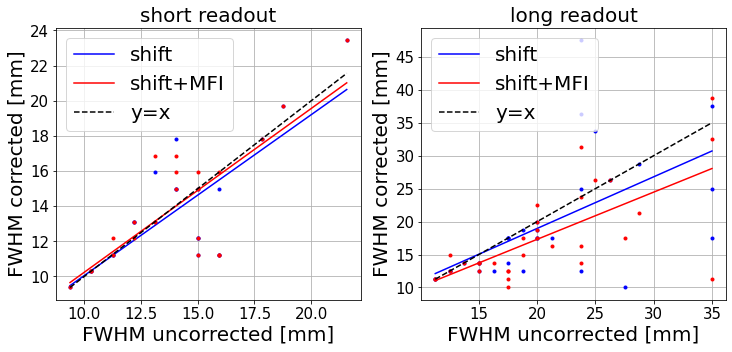

In [33]:
xp1s, z1s, fit1s, cov1s = applyFits(short_fwhm_unc, short_fwhm_gs)
xp2s, z2s, fit2s, cov2s = applyFits(short_fwhm_unc, short_fwhm_mfi)
xp1l, z1l, fit1l, cov1l = applyFits(long_fwhm_unc, long_fwhm_gs)
xp2l, z2l, fit2l, cov2l = applyFits(long_fwhm_unc, long_fwhm_mfi)



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
fs=20
ax1.plot(short_fwhm_unc, short_fwhm_gs,'b.')
ax1.plot(xp1s, fit1s(xp1s),'b-', label='shift')
ax1.plot(short_fwhm_unc, short_fwhm_mfi,'r.')
ax1.plot(xp2s, fit2s(xp2s),'r-', label='shift+MFI')
ax1.plot(xp2s, xp2s,'k--', label='y=x')
ax1.set_xlabel('FWHM uncorrected [mm]', fontsize=fs)
ax1.set_ylabel('FWHM corrected [mm]', fontsize=fs)
ax1.set_title('short readout', fontsize=fs)
ax1.legend(fontsize=fs)
ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.plot(long_fwhm_unc, long_fwhm_gs,'b.')
ax2.plot(xp1l, fit1l(xp1l),'b-', label='shift')
ax2.plot(long_fwhm_unc, long_fwhm_mfi,'r.')
ax2.plot(xp2l, fit2l(xp2l),'r-', label='shift+MFI')
ax2.plot(xp2l, xp2l,'k--', label='y=x')
ax2.set_xlabel('FWHM uncorrected [mm]', fontsize=fs)
ax2.set_ylabel('FWHM corrected [mm]', fontsize=fs)
ax2.set_title('long readout', fontsize=fs)
ax2.legend(fontsize=fs)
ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=15)

fig.savefig('rawFigs/fwhm_pixels_regressions.pdf')

print('short readout, GS')
print(str(z1s[0])+'+/-'+str(np.sqrt(np.diag(cov1s))[0]))
print('short readout, MFI')
print(str(z2s[0])+'+/-'+str(np.sqrt(np.diag(cov2s))[0]))

print('long readout, GS')
print(str(z1l[0])+'+/-'+str(np.sqrt(np.diag(cov1l))[0]))
print('long readout, MFI')
print(str(z2l[0])+'+/-'+str(np.sqrt(np.diag(cov2l))[0]))




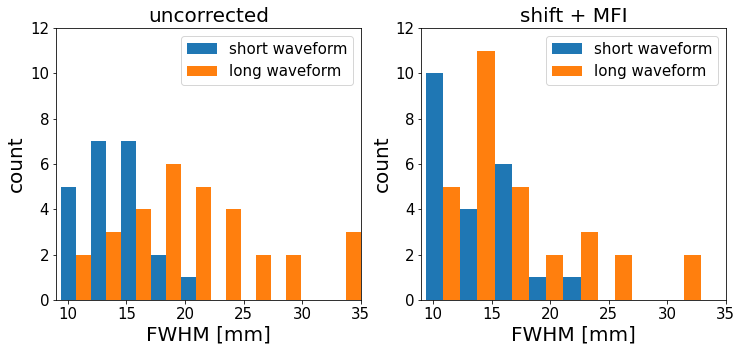

In [46]:
#plt.hist([short_fwhm_unc,short_fwhm_gs,short_fwhm_mfi], bins=6, histtype='bar')
#plt.hist([short_fwhm_unc, long_fwhm_unc], bins=6, histtype='bar')
nbins = 10
colors = [sns.color_palette()[0], sns.color_palette()[1]]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
labels = ['short waveform', 'long waveform']
ax1.hist([short_fwhm_unc, long_fwhm_unc], bins=nbins, 
         histtype='bar', label=labels, color=colors, rwidth=1.0)
ax2.hist([short_fwhm_mfi, long_fwhm_mfi], bins=nbins,
         histtype='bar', label=labels, color=colors, rwidth=1.0)



# alpha=0.5,
ax1.set_xlabel('FWHM [mm]', fontsize=fs)
ax1.set_ylabel('count', fontsize=fs)
ax1.set_title('uncorrected', fontsize=fs)
ax1.legend(fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylim([0,12])
ax1.set_xlim([9,35])


ax2.set_xlabel('FWHM [mm]', fontsize=fs)
ax2.set_ylabel('count', fontsize=fs)
ax2.set_title('shift + MFI', fontsize=fs)
ax2.legend(fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim([0,12])
ax2.set_xlim([9,35])

fig.savefig('rawFigs/fwhm_pixels_hist.pdf')

In [35]:
print(stats.ttest_rel(long_fwhm_mfi, long_fwhm_unc))
#print(stats.f_oneway(long_fwhm_unc, long_fwhm_gs, long_fwhm_mfi))


Ttest_relResult(statistic=-2.874548897251984, pvalue=0.007370206939742845)


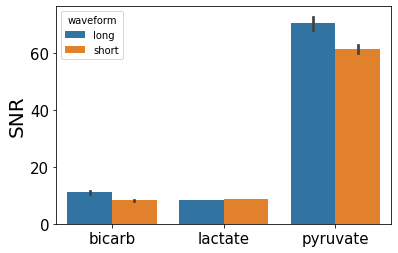

In [36]:
def loadMFI(patient):
    inFileName = "B0CorrectedImages/" + patient.mfr + ".mat"
    x = loadmat(inFileName)
    img = x['img_mfi']
    peakTime = x['peakTime']
    return img, peakTime


def metsToDF(SNR, met, vol, wf):
    mets = [met]*len(SNR)
    vols = [vol]*len(SNR)
    waveform = [wf]*len(SNR)
    df = pd.DataFrame(columns = ['SNR','metabolite','volunteer', 'waveform'])
    df['SNR'] = SNR
    df['metabolite'] = mets
    df['volunteer'] = vols
    df['waveform'] = waveform
    return df

def selectMetAndApplyCutoff(img, peakTime, met, cutoff):
    pixels = img[:,:,int(peakTime[0][im]), met]
    pixels = pixels[pixels>cutoff]
    return pixels

cutoff = 6
cutoff_p = 15

img_L1, peakTime_L1 = loadMFI(cdg.patientList[0])
img_S1, peakTime_S1 = loadMFI(cdg.patientList[1])
img_L2, peakTime_L2 = loadMFI(cdg.patientList[2])
img_S2, peakTime_S2 = loadMFI(cdg.patientList[3])
img_L1 = img_L1 / np.std(img_L1[1:50,1:50,7,0])
img_S1 = img_S1 / np.std(img_S1[1:50,1:50,7,0])
img_L2 = img_L2 / np.std(img_L2[1:50,1:50,7,0])
img_S2 = img_S2 / np.std(img_S2[1:50,1:50,7,0])

im = 0
bic_L1 = selectMetAndApplyCutoff(img_L1, peakTime_L1, im, cutoff)
bic_L2 = selectMetAndApplyCutoff(img_L2, peakTime_L2, im, cutoff)
bic_S1 = selectMetAndApplyCutoff(img_S1, peakTime_S1, im, cutoff)
bic_S2 = selectMetAndApplyCutoff(img_S2, peakTime_S2, im, cutoff)


im = 1
lac_L1 = selectMetAndApplyCutoff(img_L1, peakTime_L1, im, cutoff)
lac_L2 = selectMetAndApplyCutoff(img_L2, peakTime_L2, im, cutoff)
lac_S1 = selectMetAndApplyCutoff(img_S1, peakTime_S1, im, cutoff)
lac_S2 = selectMetAndApplyCutoff(img_S2, peakTime_S2, im, cutoff)

im = 2
pyr_L1 = selectMetAndApplyCutoff(img_L1, peakTime_L1, im, cutoff_p)
pyr_L2 = selectMetAndApplyCutoff(img_L2, peakTime_L2, im, cutoff_p)
pyr_S1 = selectMetAndApplyCutoff(img_S1, peakTime_S1, im, cutoff_p)
pyr_S2 = selectMetAndApplyCutoff(img_S2, peakTime_S2, im, cutoff_p)

bic_L1_df = metsToDF(bic_L1,'bicarb',1,'long')
bic_L2_df = metsToDF(bic_L2,'bicarb',2,'long')
bic_S1_df = metsToDF(bic_S1,'bicarb',1,'short')
bic_S2_df = metsToDF(bic_S2,'bicarb',2,'short')

lac_L1_df = metsToDF(lac_L1,'lactate',1,'long')
lac_L2_df = metsToDF(lac_L2,'lactate',2,'long')
lac_S1_df = metsToDF(lac_S1,'lactate',1,'short')
lac_S2_df = metsToDF(lac_S2,'lactate',2,'short')

pyr_L1_df = metsToDF(pyr_L1,'pyruvate',1,'long')
pyr_L2_df = metsToDF(pyr_L2,'pyruvate',2,'long')
pyr_S1_df = metsToDF(pyr_S1,'pyruvate',1,'short')
pyr_S2_df = metsToDF(pyr_S2,'pyruvate',2,'short')

df = pd.DataFrame()

df = pd.concat([df, bic_L1_df], axis=0)
df = pd.concat([df, bic_L2_df], axis=0)
df = pd.concat([df, bic_S1_df], axis=0)
df = pd.concat([df, bic_S2_df], axis=0)

df = pd.concat([df, lac_L1_df], axis=0)
df = pd.concat([df, lac_L2_df], axis=0)
df = pd.concat([df, lac_S1_df], axis=0)
df = pd.concat([df, lac_S2_df], axis=0)

df = pd.concat([df, pyr_L1_df], axis=0)
df = pd.concat([df, pyr_L2_df], axis=0)
df = pd.concat([df, pyr_S1_df], axis=0)
df = pd.concat([df, pyr_S2_df], axis=0)

df1 = df[df['volunteer']==1]
df2 = df[df['volunteer']==2]

fig, ax = plt.subplots()
sns.barplot(x="metabolite", y="SNR", hue="waveform", data=df)
ax.set_xlabel('')
ax.set_ylabel('SNR', fontsize=fs)

ax.tick_params(axis='both', which='major', labelsize=15)

fig.savefig('rawFigs/SNR_longshort_hist.pdf')


## 


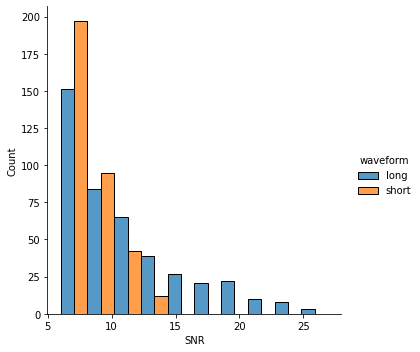

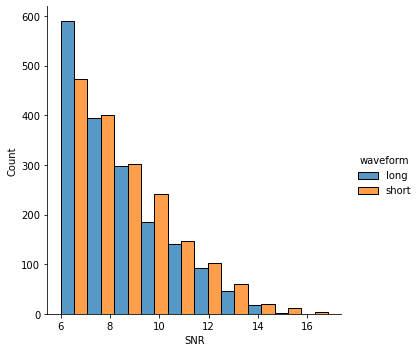

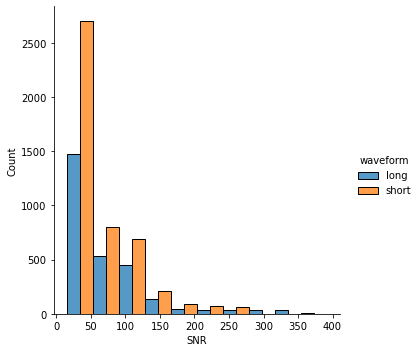

In [37]:

dfbic = df[df['metabolite']=='bicarb']
dflac = df[df['metabolite']=='lactate']
dfpyr = df[df['metabolite']=='pyruvate']

sns.displot(data=dfbic, x="SNR", hue='waveform', multiple="dodge",bins=10)
sns.displot(data=dflac, x="SNR", hue='waveform', multiple="dodge",bins=10)
sns.displot(data=dfpyr, x="SNR", hue='waveform', multiple="dodge",bins=10)


In [38]:
35/28

1.25

In [39]:
p715_noise = 60.0 
p715_bicarb = np.array((561, 896)) / p715_noise
p715_bicarb_u = np.array((85, 109))/ p715_noise
p715_lactate = np.array((627, 438))/ p715_noise
p715_lactate_u = np.array((151, 71))/ p715_noise
p715_pyruvate = np.array((3683, 3931))/ p715_noise
p715_pyruvate_u = np.array((512, 418))/ p715_noise

p721_noise = 41.75
p721_bicarb = np.array((285, 327)) / p721_noise
p721_bicarb_u = np.array((54, 65))/ p721_noise

p721_lactate = np.array((384, 251)) / p721_noise
p721_lactate_u = np.array((85, 82))/ p721_noise
p721_pyruvate = np.array((23096, 24810)) / p721_noise
p721_pyruvate_u = np.array((2650, 2445))/ p721_noise


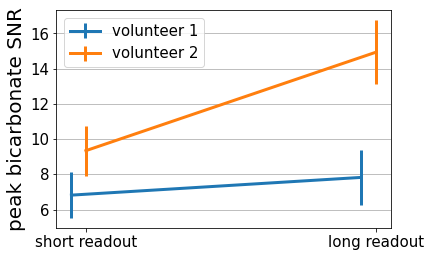

In [40]:
x1 = [1,2]
x2 = [1.05,2.05]
tickLabs = ['short readout','long readout']
fig, ax = plt.subplots()
#figsize=(7,5)
ax.errorbar(x1, p721_bicarb, yerr=p721_bicarb_u, linewidth=3,label='volunteer 1')
ax.errorbar(x2, p715_bicarb, yerr=p715_bicarb_u, linewidth=3,label='volunteer 2')
ax.set_ylabel('peak bicarbonate SNR', fontsize=fs)
ax.set_xlabel('')
#ax.set_yscale('log')
ax.set_xticks(x2)
ax.set_xticklabels(tickLabs,  fontsize=fs)
#rotation=tr,
ax.tick_params(axis='y', which='major', labelsize=15)
#ax3.set_ylim([.9, 2.7])
ax.grid(axis='y')
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
fig.savefig('rawFigs/SNR_longshort_snr.pdf')


In [41]:
A1 = p715_bicarb
s1 = p715_bicarb_u
f1 = A1[1]/A1[0]
S1 = f1 * np.sqrt( (s1[1]/A1[1])**2 +  (s1[0]/A1[0])**2) 

A2 = p721_bicarb
s2 = p721_bicarb_u
f2 = A2[1]/A2[0]
S2 = f1 * np.sqrt( (s2[1]/A2[1])**2 +  (s2[0]/A2[0])**2) 

f3 = (f1+f2)/2
S3 = np.sqrt( (0.5 *S1 )**2 +  (0.5 * S2)**2) 

print('volunteer 1='+str(p715_bicarb)+'+/-'+str(p715_bicarb_u))
print('volunteer 2='+str(p721_bicarb)+'+/-'+str(p721_bicarb_u))

print('volunteer 1 ratio: '+str(f1)+' +/- '+str(S1))
print('volunteer 2 ratio: '+str(f2)+' +/- '+str(S2))
print('mean '+str(f3)+' +/- '+str(S3))


volunteer 1=[ 9.35       14.93333333]+/-[1.41666667 1.81666667]
volunteer 2=[6.82634731 7.83233533]+/-[1.29341317 1.55688623]
volunteer 1 ratio: 1.5971479500891266 +/- 0.31034026470119563
volunteer 2 ratio: 1.1473684210526316 +/- 0.4385981045098208
mean 1.372258185570879 +/- 0.2686444570312292


In [42]:
f3 = (f1+f2)/2
S3 = np.sqrt( (0.5 *S1 )**2 +  (0.5 * S2)**2) 
print('mean '+str(f3)+' +/- '+str(S3))

mean 1.372258185570879 +/- 0.2686444570312292


In [43]:
s1

array([1.41666667, 1.81666667])

In [44]:
np.sqrt(45/26)

1.3155870289605438

In [45]:
7.8/6.8

1.1470588235294117